# Avoin data opetuksessa -koulutuksen osallistujat

Tässä notebookissa on statistiikkaa Avoin data opetuksessa -koulutuksen osallistujista.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from wordcloud import WordCloud
from IPython.display import display

data = pd.read_csv('registrations_clean.csv')
coords = pd.read_csv('coordinates.csv')
prog_lng = pd.read_csv('programming-languages.csv')

In [2]:
map = folium.Map(location=(65.5, 23.8), zoom_start=5)
for point in range(0, len(coords)):
    folium.Marker((coords['lat'][point],coords['lon'][point])).add_to(map)
display(map)

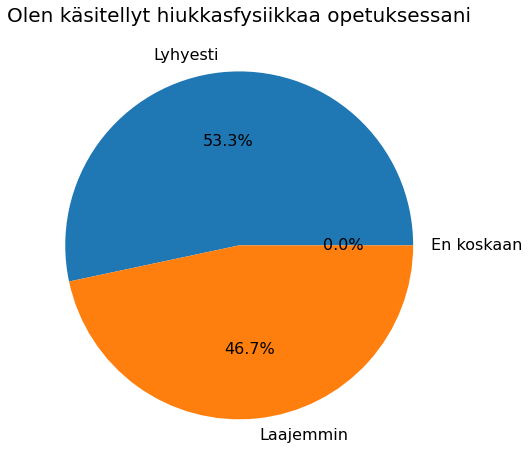

In [3]:
hiukkasfysiikka = data['Olen käsitellyt hiukkasfysiikkaa opetuksessani'].value_counts()
lyhyesti = hiukkasfysiikka[0] + 1 # Lisätään yksi vastaus, jossa oli valittu molemmat
laajemmin = hiukkasfysiikka[1] + 1 # Lisätään yksi vastaus, jossa oli valittu molemmat

plt.figure(figsize=(12,8))
plt.title('Olen käsitellyt hiukkasfysiikkaa opetuksessani', fontsize=20)
labels = ['Lyhyesti', 'Laajemmin', 'En koskaan']
patches, texts, autotexts = plt.pie([lyhyesti, laajemmin, 0], labels=labels, autopct='%1.1f%%')
[ text.set_fontsize(16) for text in texts ]
[ text.set_fontsize(16) for text in autotexts ]
plt.show()

In [4]:
concat = pd.DataFrame(data['Olen kiinnostunut käyttämään opittuja taitoja'].str.split('; ').tolist(),columns=["0","1"])
new_data = pd.concat([concat["0"],concat["1"]], ignore_index=True).dropna()

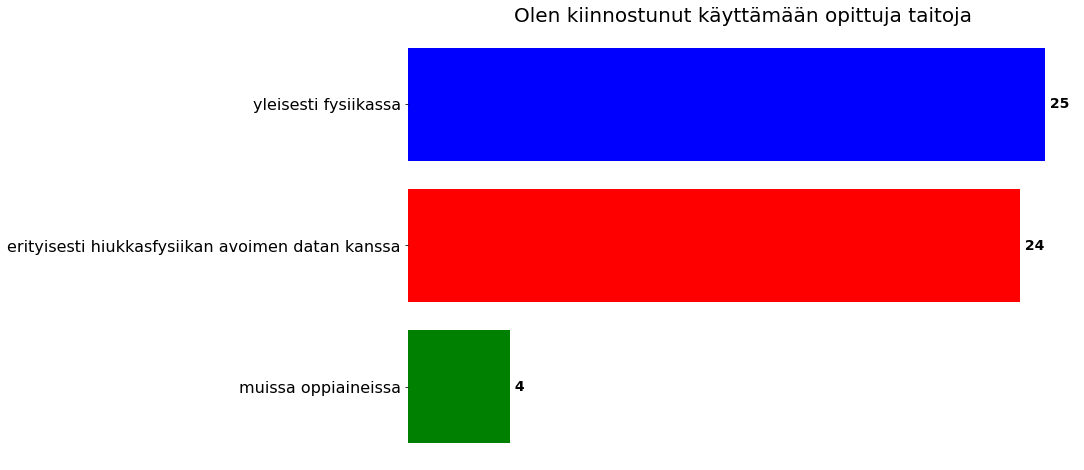

In [5]:
kiinnostus = new_data.value_counts().sort_values()
kiinnostus_kategoriat = kiinnostus.index
kiinnostus_arvot = kiinnostus.values
fig = plt.figure(figsize=(12,8))
plt.barh(kiinnostus_kategoriat, kiinnostus_arvot, color=['green','red','blue'])
for i, v in enumerate(kiinnostus_arvot):
    plt.text(v, i, " "+str(v), color='black', va='center', fontweight='bold', fontsize=14)
plt.title('Olen kiinnostunut käyttämään opittuja taitoja', fontsize=20)
plt.yticks(kiinnostus_kategoriat, )
ax = plt.gca()
ax.get_xaxis().set_ticks([])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.box(False)
plt.show()

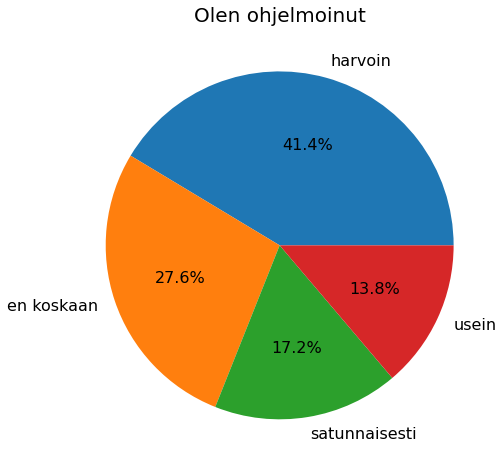

In [6]:
ohjelmointi = data['Olen ohjelmoinut'].value_counts()
ohjelmointi_kategoriat = ohjelmointi.index
ohjelmointi_arvot = ohjelmointi.values

plt.figure(figsize=(12,8))
plt.title('Olen ohjelmoinut', fontsize=20)
patches, texts, autotexts = plt.pie(ohjelmointi_arvot, labels=ohjelmointi_kategoriat, autopct='%1.1f%%')
[ text.set_fontsize(16) for text in texts ]
[ text.set_fontsize(16) for text in autotexts ]
plt.show()

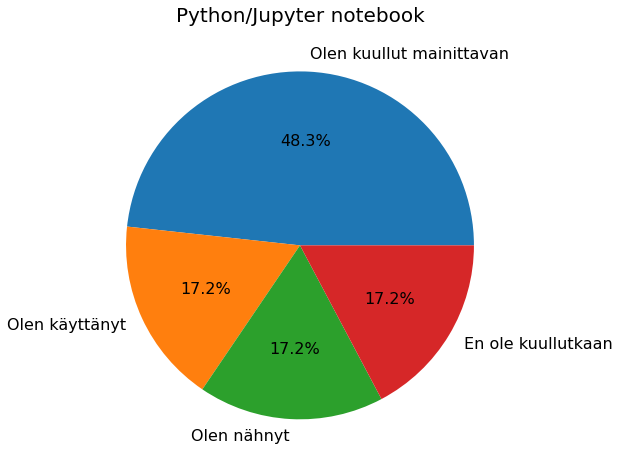

In [7]:
jupyter = data['Jupyter/python notebook? (ei ole tietokone vaan ohjelmointialusta)'].value_counts()
jupyter_kategoriat = jupyter.index
jupyter_arvot = jupyter.values

plt.figure(figsize=(12,8))
plt.title('Python/Jupyter notebook', fontsize=20)
patches, texts, autotexts = plt.pie(jupyter_arvot, labels=jupyter_kategoriat, autopct='%1.1f%%')
[ text.set_fontsize(16) for text in texts ]
[ text.set_fontsize(16) for text in autotexts ]
plt.show()

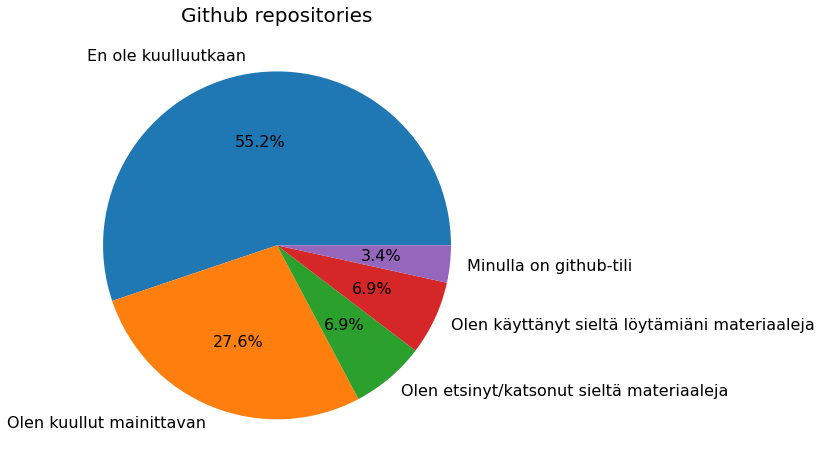

In [8]:
github = data['Github repositories'].value_counts()
github_kategoriat = github.index
github_arvot = github.values

plt.figure(figsize=(12,8))
plt.title('Github repositories', fontsize=20)
patches, texts, autotexts = plt.pie(github_arvot, labels=github_kategoriat, autopct='%1.1f%%')
[ text.set_fontsize(16) for text in texts ]
[ text.set_fontsize(16) for text in autotexts ]
plt.show()

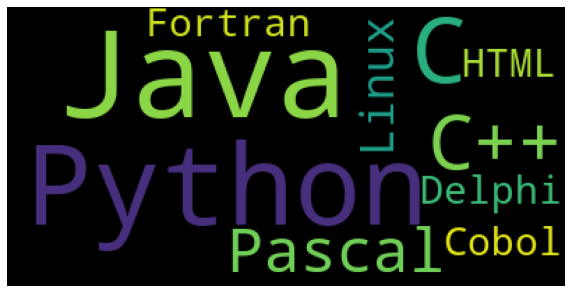

In [9]:
data_string = ' '.join(prog_lng['language'].tolist())
wordcloud = WordCloud(regexp=r"[\S]+")
wordcloud.generate(data_string)
plt.figure (figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()